https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set( rc={'figure.figsize': (15, 8)})

In [3]:
stations_maxima = pd.read_excel('Estaciones.xlsx', sheet_name='Maximos', header=1, parse_dates=['Año hid'])

In [4]:
dataset = stations_maxima['San Luis Tucuman'].dropna().values

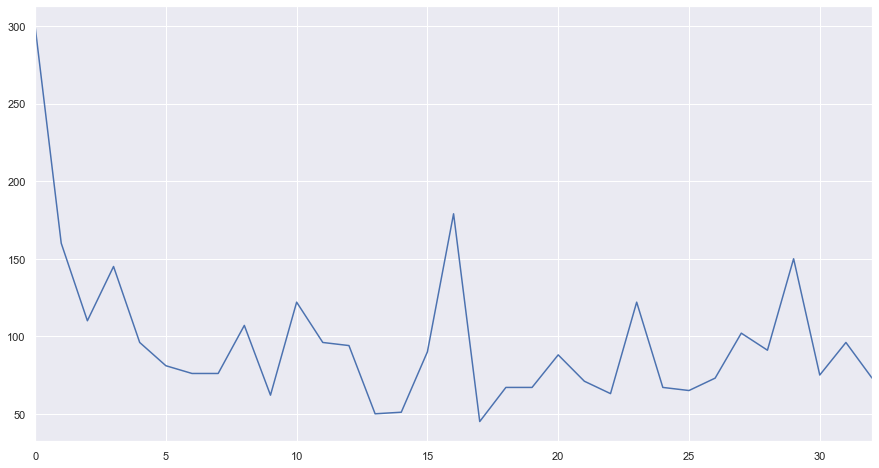

In [5]:
stations_maxima['San Luis Tucuman'].dropna().reset_index(drop=True).plot();

In [6]:
np.random.seed(42)
def split_sequence(sequence, n_steps):
    X, y = list(), list() 
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

/Users/jrchatruc/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jrchatruc/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jrchatruc/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jrchatruc/anaconda3/lib/python3.7/site-pac

In [8]:
dataset = stations_maxima['San Luis Tucuman'].dropna().values[1:]

In [10]:
n_features = 1
n_steps = 10
X, y = split_sequence(dataset, n_steps)

In [11]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [42]:
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

In [15]:
x_ = np.array(dataset[-10:])
y = []
for j in range(10):   
    x_input = x_.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    x_ = np.append(x_[1:],yhat)
    y.append(yhat)

In [32]:
prediction = np.zeros(10)
for i in range(len(prediction)):
    prediction[i] = y[i][0][0]

In [27]:
rain_forecats = np.append(dataset, prediction)

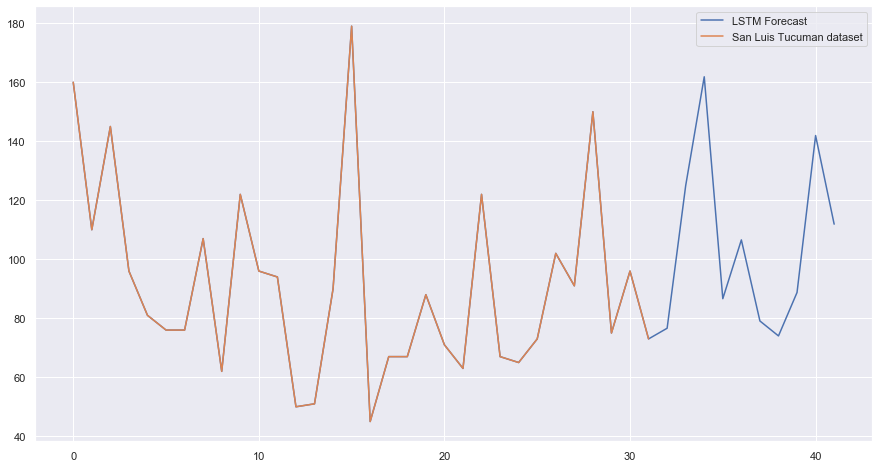

In [31]:
plt.plot(rain_forecats, label='LSTM Forecast')
plt.plot(dataset, label='San Luis Tucuman dataset' )
plt.legend();

## LSTM sobre datos del FBI (background checks)

In [13]:
df = pd.read_csv('clase_4/data/firearms.csv', parse_dates=['month'])

In [14]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-04-01,Alabama,21276.0,386.0,28951.0,12512.0,1455.0,1272,0.0,27.0,...,0.0,0.0,0.0,31.0,30.0,7.0,0.0,0.0,0.0,70748
1,2020-04-01,Alaska,85.0,68.0,3942.0,3275.0,510.0,245,0.0,1.0,...,0.0,0.0,0.0,11.0,9.0,3.0,0.0,0.0,0.0,8560
2,2020-04-01,Arizona,4500.0,675.0,33391.0,13143.0,2369.0,3121,0.0,26.0,...,0.0,0.0,0.0,25.0,19.0,3.0,0.0,0.0,0.0,59986
3,2020-04-01,Arkansas,3085.0,801.0,13814.0,8463.0,612.0,678,1.0,28.0,...,0.0,1.0,0.0,26.0,15.0,1.0,0.0,1.0,0.0,30575
4,2020-04-01,California,24460.0,0.0,59219.0,31759.0,6330.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122999


In [15]:
total = df[['totals', 'month']].groupby('month').sum();

In [16]:
total.head()

,totals
month,
1998-11-01,21176
1998-12-01,870722
1999-01-01,585974
1999-02-01,690215
1999-03-01,741687


In [17]:
total = total.drop(total.iloc[[0]].index)

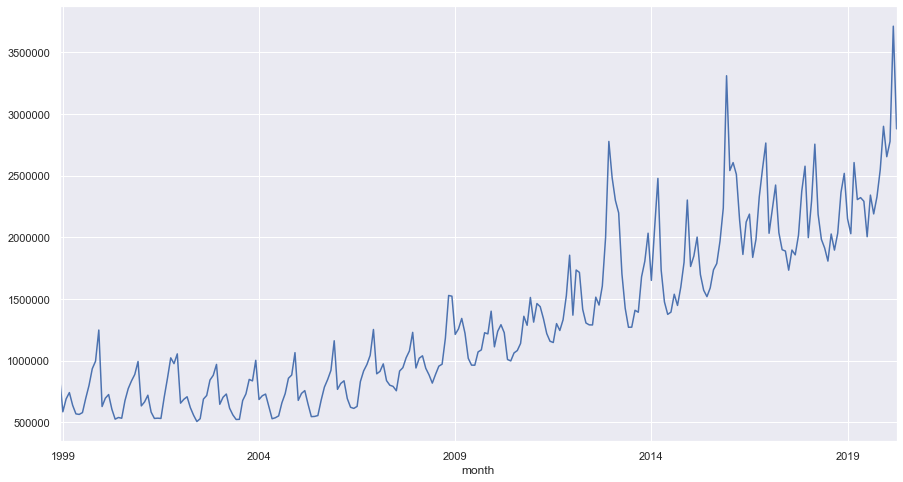

In [18]:
total['totals'].plot();

In [19]:
dataset = total['totals'].values[:-24]

In [18]:
n_features = 1
n_steps = 12
X, y = split_sequence(dataset, n_steps)

In [19]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [105]:
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

In [116]:
x_ = np.array(dataset[-n_steps:])
y = []
for j in range(24):   
    x_input = x_.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    x_ = np.append(x_[1:],yhat)
    y.append(yhat)

In [117]:
prediction = np.zeros(24)
for i in range(len(prediction)):
    prediction[i] = y[i][0][0]

In [118]:
forecast = total['totals'].copy()[-24:]
forecast[:] = prediction

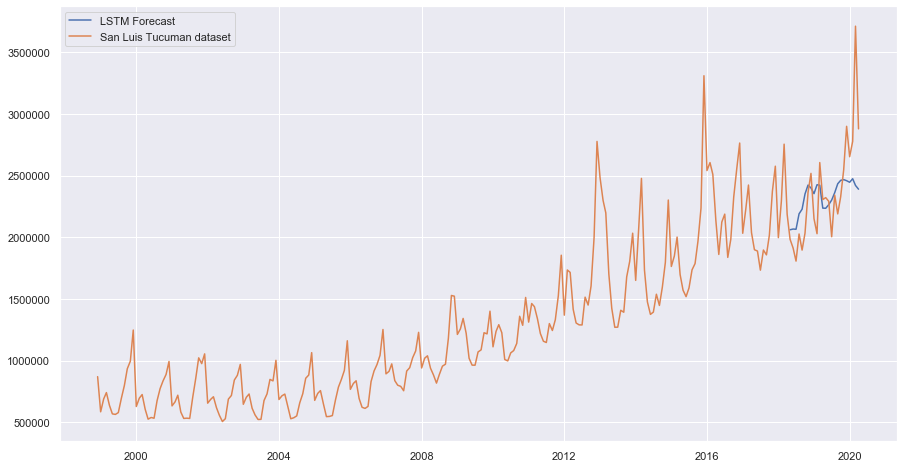

In [120]:
plt.plot(forecast, label='LSTM Forecast')
plt.plot(total['totals'], label='FBI data' )
plt.legend();

## Wavelets decomposition -> LSTM

In [20]:
import pywt

In [21]:
(cA, cD) = pywt.dwt(dataset,'db2')

In [22]:
low = pywt.idwt(None,cD, 'db2', 'smooth')
high = pywt.idwt(cA, None, 'db2', 'smooth')

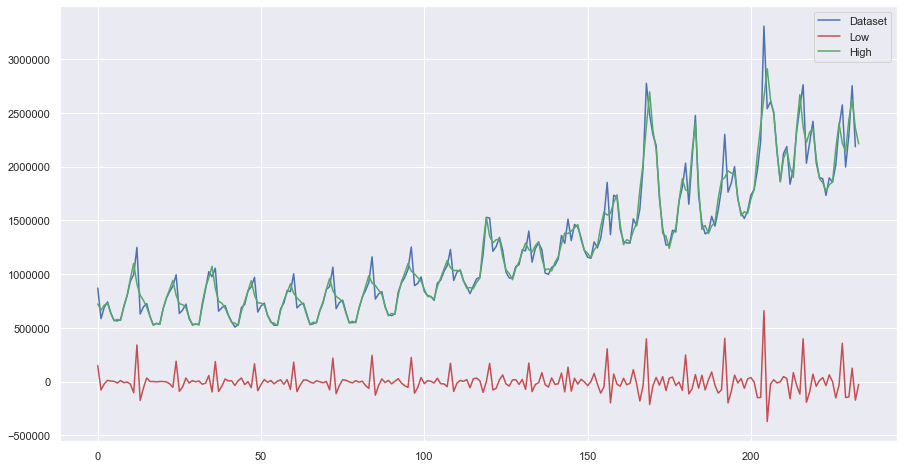

In [23]:
plt.plot(dataset,'-b', label='Dataset' )
plt.plot(low, '-r', label='Low')
plt.plot(high,'-g', label='High')
plt.legend();

In [24]:
n_features = 1
n_steps = 12
X, y = split_sequence(low, n_steps)

In [25]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [26]:
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

In [27]:
x_ = np.array(low[-n_steps:])
y = []
for j in range(24):   
    x_input = x_.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    x_ = np.append(x_[1:],yhat)
    y.append(yhat)

In [28]:
prediction_low = np.zeros(24)
for i in range(len(prediction_low)):
    prediction_low[i] = y[i][0][0]

In [29]:
forecast_low = total['totals'].copy()[-24:]
forecast_low[:] = prediction_low

In [30]:
X, y = split_sequence(high, n_steps)

In [31]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [32]:
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

In [33]:
x_ = np.array(high[-n_steps:])
y = []
for j in range(24):   
    x_input = x_.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    x_ = np.append(x_[1:],yhat)
    y.append(yhat)

In [34]:
prediction_high = np.zeros(24)
for i in range(len(prediction_high)):
    prediction_high[i] = y[i][0][0]

In [35]:
forecast_high = total['totals'].copy()[-24:]
forecast_high[:] = prediction_high

In [36]:
forecast_final = forecast_low + forecast_high

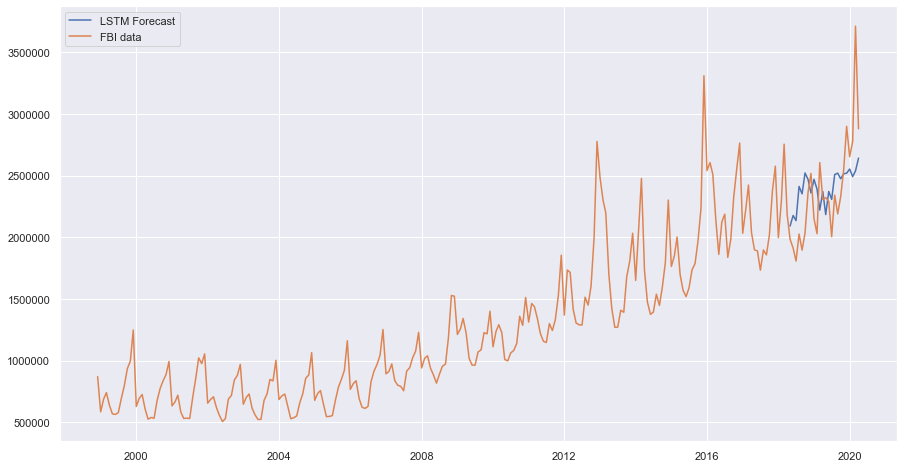

In [37]:
plt.plot(forecast_final, label='LSTM Forecast')
plt.plot(total['totals'], label='FBI data' )
plt.legend();

## Promediando varios fits

In [38]:
forecasts_low = {}
for i in range(5):
    dataset = low 
    n_features = 1
    n_steps = 12
    X, y = split_sequence(dataset, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=200, verbose=0)
    x_ = np.array(dataset[-12:])
    y = []
    for j in range(24):   
        x_input = x_.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        y.append(yhat)
    forecasts_low[i] = y

In [39]:
forecasts_high = {}
for i in range(5):
    dataset = high 
    n_features = 1
    n_steps = 12
    X, y = split_sequence(dataset, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=200, verbose=0)
    x_ = np.array(dataset[-12:])
    y = []
    for j in range(24):   
        x_input = x_.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        y.append(yhat)
    forecasts_high[i] = y

In [40]:
final_forecast_high = []
for i in range(len(forecasts_high)):
    mean = []
    for key in forecasts_high.keys():
        mean.append(forecasts_high[key][i][0][0])
    final_forecast_high.append(np.mean(mean))

In [41]:
predictions_low = np.zeros((5, 24))
for i in range(5):
    predictions_low[i] = np.array(forecasts_low[i]).flatten()

In [42]:
forecasts_final_low = [None] * 5
for i in range(5):
    forecasts_final_low[i] = total['totals'].copy()[-24:]
    forecasts_final_low[i][:] = predictions_low[i]

In [43]:
predictions_high = np.zeros((5, 24))
for i in range(5):
    predictions_high[i] = np.array(forecasts_high[i]).flatten()

In [44]:
forecasts_final_high = [None] * 5
for i in range(5):
    forecasts_final_high[i] = total['totals'].copy()[-24:]
    forecasts_final_high[i][:] = predictions_high[i]

In [45]:
forecasts_final = []
for i in range(5):
    forecasts_final.append(forecasts_final_low[i] + forecasts_final_high[i])

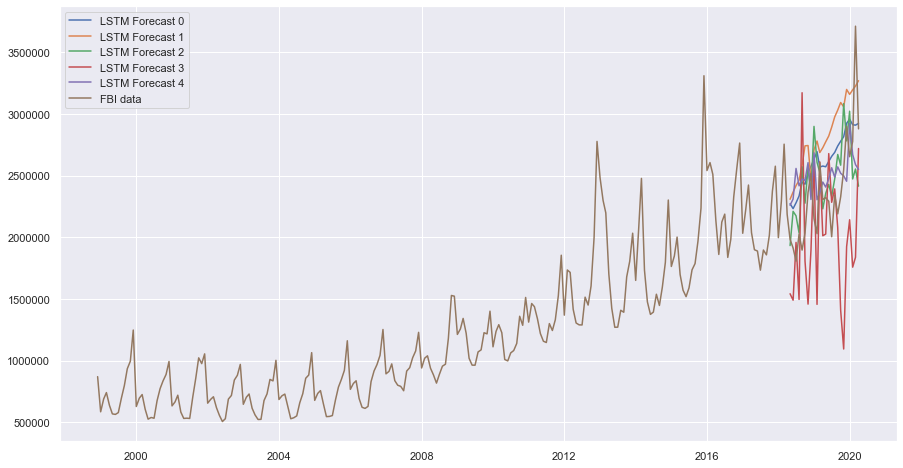

In [46]:
for i in range(5):
    plt.plot(forecasts_final[i], label='LSTM Forecast {}'.format(i))
plt.plot(total['totals'], label='FBI data' )
plt.legend();

### Promedio

In [49]:
final_prediction_mean_low = np.array([])
for i in range(24):
    mean = []
    for j in range(5):
        mean.append(predictions_low[j][i])
    final_prediction_mean_low = np.append(final_prediction_mean_low, np.mean(mean))

In [50]:
final_prediction_mean_high = np.array([])
for i in range(24):
    mean = []
    for j in range(5):
        mean.append(predictions_high[j][i])
    final_prediction_mean_high = np.append(final_prediction_mean_high, np.mean(mean))

In [51]:
final_prediction_mean = final_prediction_mean_low + final_prediction_mean_high

In [53]:
final_forecast_mean = total['totals'].copy()[-24:]
final_forecast_mean[:] = final_prediction_mean

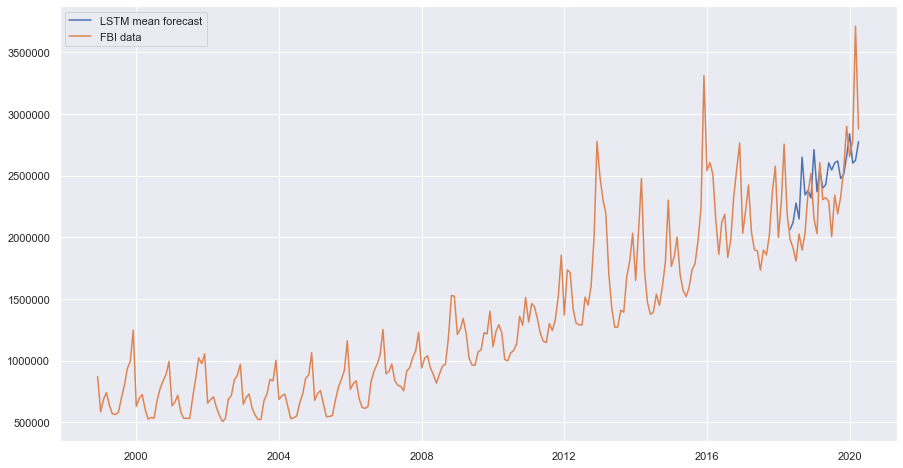

In [54]:
plt.plot(final_forecast_mean, label='LSTM mean forecast')
plt.plot(total['totals'], label='FBI data' )
plt.legend();